Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/abhui/Machine Learning/Data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


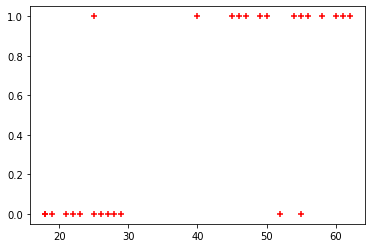

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

As shown above, linear regression is not a good fit. We need to run the data thru sigmoid function and use probability determination to classify the data.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_predicted = model.predict(X_test)

In [14]:
y_predicted

array([0, 1, 1, 1, 0, 0], dtype=int64)

From the result above, we can see that younger person is not predicated to buy insurance. Let's examine the probability in more detail below.

In [15]:
model.predict_proba(X_test)

array([[0.9351622 , 0.0648378 ],
       [0.05263262, 0.94736738],
       [0.16043741, 0.83956259],
       [0.05263262, 0.94736738],
       [0.8303175 , 0.1696825 ],
       [0.90074823, 0.09925177]])

First test entry with 22 years in age has 6.48% probability of buying insurance. Model accuracy shows that model is 83.33% accurate as shown below.

In [16]:
model.score(X_test,y_test)

0.8333333333333334

We can perform the analysis manually. First find the coefficient and intercept of the model. 

In [17]:
model.coef_

array([[0.15442173]])

In [18]:
model.intercept_

array([-5.60284398])

Lets defined sigmoid function now and do the math with hand

In [19]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [33]:
age = 36
prediction_function(age)

0.49550012149606354

In [34]:
model.predict_proba([[36]])

array([[0.51091373, 0.48908627]])